# [Adult Data Analysis]()

[PMR3508](https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=PMR3508) - Machine Learning and Pattern Recognition

Professor Fabio Gagliardi Cozman

10284952 - [Vitor Gratiere Torres](https://github.com/vitorgt/PMR3508)

This analysis consists in predicting whether someone has an income greater or lesser than 50k with attributes like level of education, age, work class, occupation, among others, and will be based on # steps as follows:

## 1. Import data and python modules

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

adult = pd.read_csv('adult-pmr3508/train_data.csv')
adult.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


## 2. Factorize

Encode objects as an enumerated type or categorical variable. This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

Note: ```education``` is already factorized in ```education.num```. I've followed the same nomenclature for the following features while storing them on ```uniques``` for further reference.

In [2]:
uniques = {
}

adult['workclass.num'], uniques['workclass'] = pd.factorize(adult['workclass'], sort=True)
adult['marital.status.num'], uniques['marital.status'] = pd.factorize(adult['marital.status'], sort=True)
adult['occupation.num'], uniques['occupation'] = pd.factorize(adult['occupation'], sort=True)
adult['relationship.num'], uniques['relationship'] = pd.factorize(adult['relationship'], sort=True)
adult['race.num'], uniques['race'] = pd.factorize(adult['race'], sort=True)
adult['sex.num'], uniques['sex'] = pd.factorize(adult['sex'], sort=True)
adult['native.country.num'], uniques['native.country'] = pd.factorize(adult['native.country'], sort=True)
adult['income'], uniques['income'] = pd.factorize(adult['income'], sort=True)

In [3]:
adult.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass.num,marital.status.num,occupation.num,relationship.num,race.num,sex.num,native.country.num
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817,3.868796,2.611794,6.572912,1.446376,3.665848,0.669195,36.718796
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586,1.455879,1.506225,4.228809,1.606794,0.848817,0.470510,7.823892
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000,4.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000,4.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000,4.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,8.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education.num'}>],
       [<AxesSubplot:title={'center':'capital.gain'}>,
        <AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'workclass.num'}>,
        <AxesSubplot:title={'center':'marital.status.num'}>,
        <AxesSubplot:title={'center':'occupation.num'}>,
        <AxesSubplot:title={'center':'relationship.num'}>],
       [<AxesSubplot:title={'center':'race.num'}>,
        <AxesSubplot:title={'center':'sex.num'}>,
        <AxesSubplot:title={'center':'native.country.num'}>,
        <AxesSubplot:>]], dtype=object)

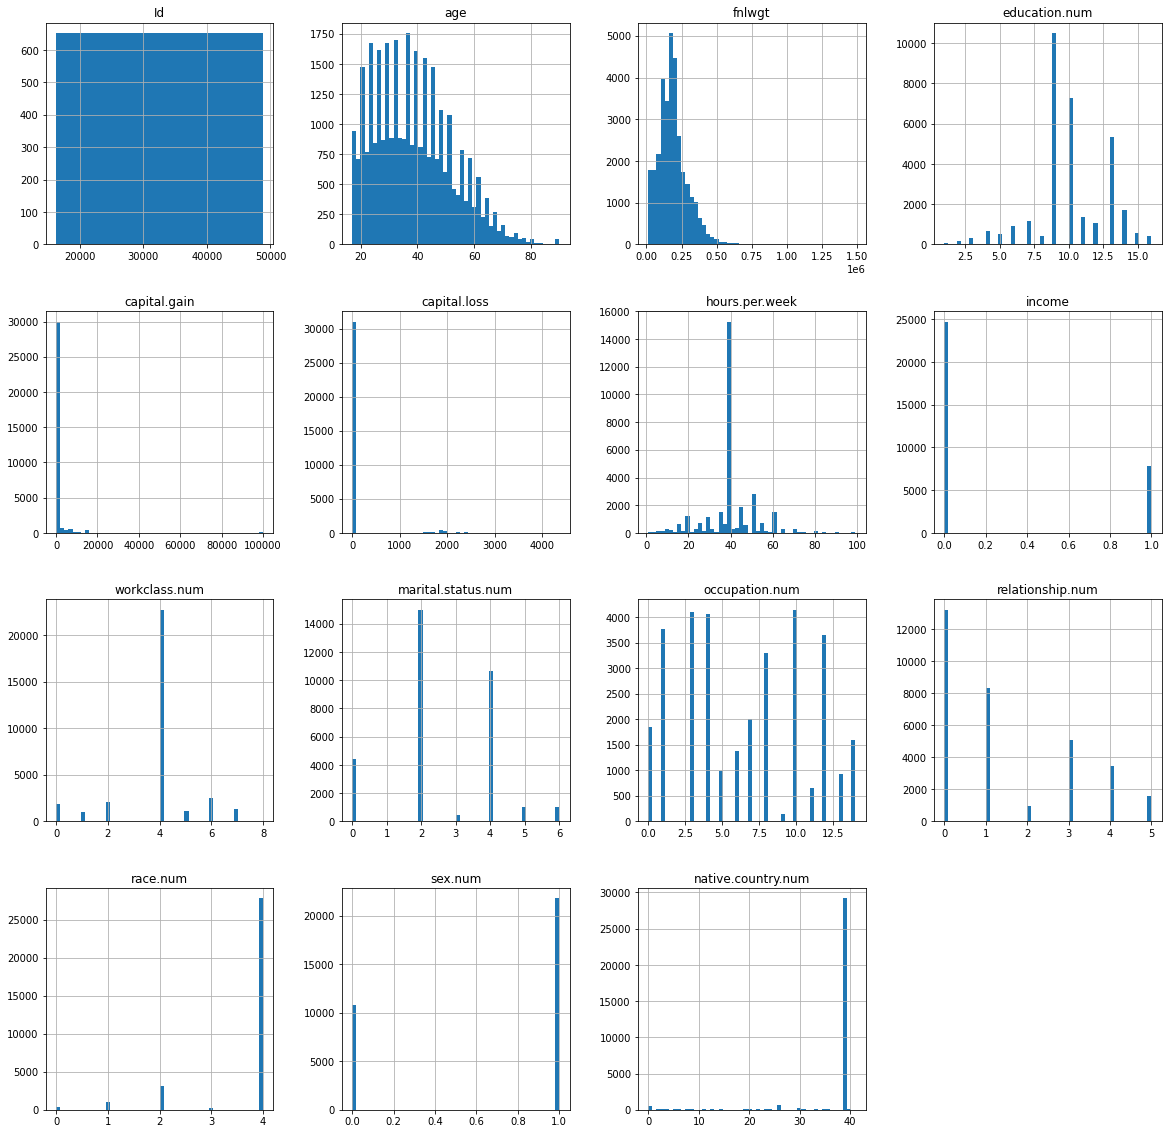

In [4]:
# fig, ax = plt.subplots(5, 3, figsize=(20,10))
# fig = plt.figure(figsize=(20, 80))

# for i in range(1, 16):
#     ax = fig.add_subplot(15,1,i)
#     ax.plot(np.asarray(adult.iloc[:,i].value_counts()))
#     ax.set_title(adult.columns[i])
#     print(np.asarray(adult.iloc[:,i].value_counts()))

# plt.show()

adult.hist(bins=50, figsize=(20,20))

Id       age    fnlwgt  education.num  capital.gain  \
Id                  1.000000 -0.010118  0.006882      -0.001750     -0.000964   
age                -0.010118  1.000000 -0.076646       0.036527      0.077674   
fnlwgt              0.006882 -0.076646  1.000000      -0.043159      0.000437   
education.num      -0.001750  0.036527 -0.043159       1.000000      0.122627   
capital.gain       -0.000964  0.077674  0.000437       0.122627      1.000000   
capital.loss       -0.004537  0.057775 -0.010259       0.079932     -0.031614   
hours.per.week      0.003038  0.068756 -0.018770       0.148127      0.078409   
income             -0.000739  0.234039 -0.009481       0.335182      0.223333   
workclass.num       0.008418  0.003786 -0.016587       0.052015      0.033828   
marital.status.num -0.010754 -0.266292  0.028184      -0.069338     -0.043398   
occupation.num      0.006378 -0.020946  0.001554       0.109748      0.025511   
relationship.num   -0.001287 -0.263698  0.008922      

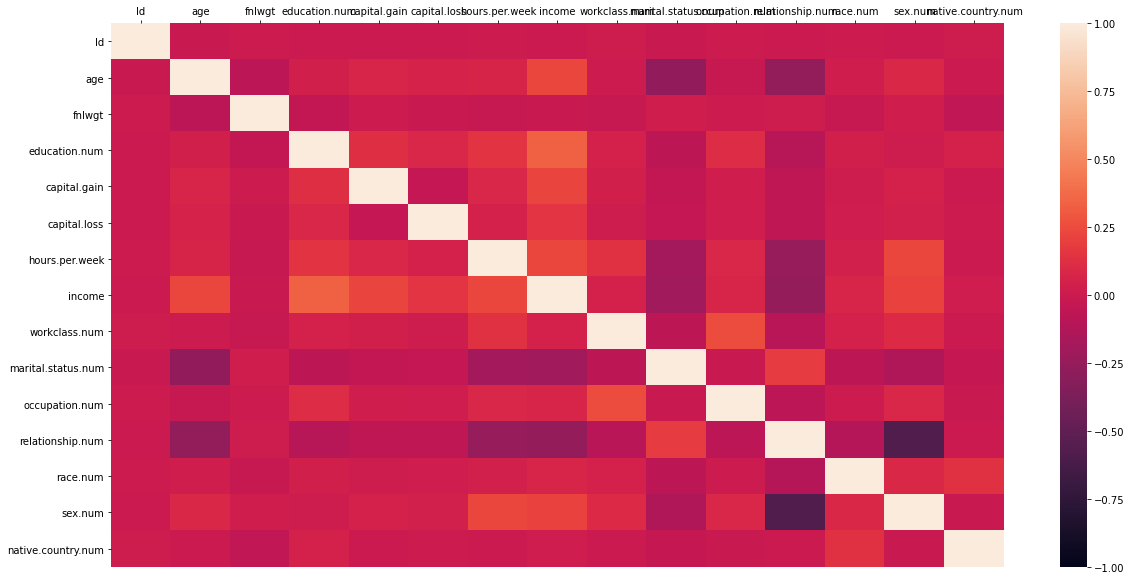

In [5]:
corrmat =  adult.corr()
print(corrmat)
plt.figure(figsize=(20,10))
sns.heatmap(corrmat, vmax=1., vmin=-1.).xaxis.tick_top()

In [6]:
# pd.plotting.scatter_matrix(adult[["marital.status.num", "age", "education.num", "fnlwgt", "capital.gain"]], alpha=0.2, figsize=(10, 10))